In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = '../input/skin-cancer-malignant-vs-benign/train/'
test_dir = '../input/skin-cancer-malignant-vs-benign/test/'

In [3]:
print(os.listdir('../input/skin-cancer-malignant-vs-benign/'))

['data', 'test', 'train']


In [4]:
# Get number of files in each directory. The train and test directories
# each have the subdirecories "benign" and "malignant".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

In [5]:
print(total_train)
print(total_test)

2637
660


In [6]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, 
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


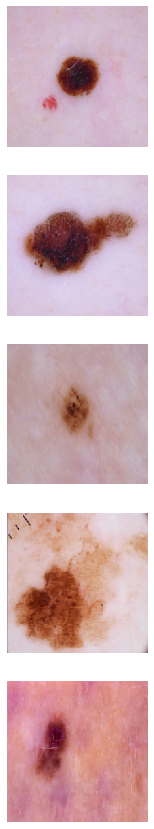

In [8]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% malignant")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% benign")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=30,                                     
                                           vertical_flip=True,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           brightness_range=[0.4,1.5])

Found 2637 images belonging to 2 classes.


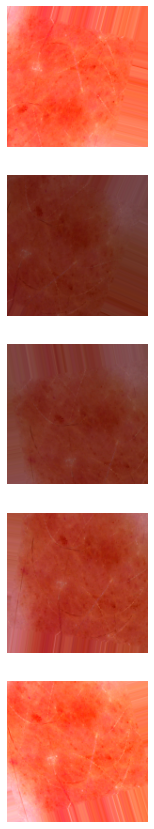

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

2022-02-05 16:26:15.948099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 16:26:16.052459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 16:26:16.053237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 16:26:16.054455: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
history = model.fit(x=train_data_gen,
                    steps_per_epoch=total_train//batch_size, 
                    epochs=epochs)

2022-02-05 16:26:19.524723: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-02-05 16:26:22.598359: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 37s 1s/step - loss: 0.7481 - accuracy: 0.5668
Epoch 2/15
20/20 [==============================] - 20s 987ms/step - loss: 0.6032 - accuracy: 0.6796
Epoch 3/15
20/20 [==============================] - 21s 1s/step - loss: 0.5089 - accuracy: 0.7473
Epoch 4/15
20/20 [==============================] - 21s 1s/step - loss: 0.4547 - accuracy: 0.7792
Epoch 5/15
20/20 [==============================] - 20s 991ms/step - loss: 0.4398 - accuracy: 0.7820
Epoch 6/15
20/20 [==============================] - 21s 1s/step - loss: 0.4650 - accuracy: 0.7732
Epoch 7/15
20/20 [==============================] - 20s 982ms/step - loss: 0.4356 - accuracy: 0.7708
Epoch 8/15
20/20 [==============================] - 20s 1s/step - loss: 0.4234 - accuracy: 0.7876
Epoch 9/15
20/20 [==============================] - 20s 1s/step - loss: 0.4056 - accuracy: 0.7979
Epoch 10/15
20/20 [==============================] - 20s 977ms/step - loss: 0.4040 - accuracy: 0.7892
Epoch 11/15
20/20 

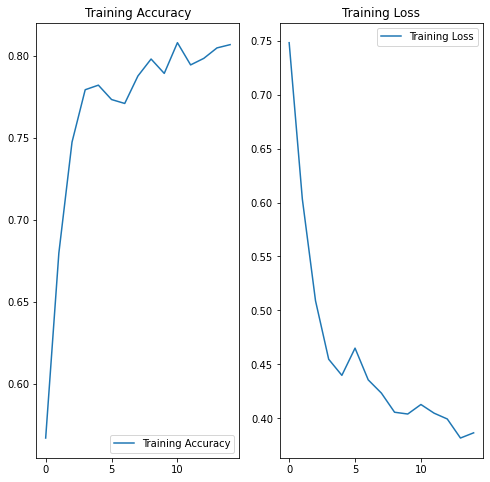

In [13]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

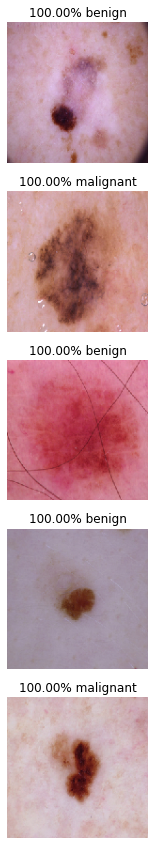

In [14]:
test_images, _ = next(test_data_gen)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
plotImages(test_images[:5], probabilities=probabilities)